## Required Installations

In [17]:
!pip install prophet
!pip install seaborn
!pip install matplotlib
!pip install pmdarima

## Mount Drive

In [18]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


## Load and Separate Teams into team_time_dataframe

In [19]:
# Load Data
data = pd.read_csv('/content/drive/MyDrive/CMPE252_project/time_series_data.csv')

teams = data['Home Team'].unique()

# Separate Teams into team_time_dataframe
team_time_dataframe = {}
for team in teams:
  team_time_data = []
  for index, game in data.iterrows():
    game_data = []
    if game['Home Team'] == team:
      game_data.append(game['gameDate'])
      game_data.append(game['Home Team Current Season Win Pctg'])
    if game['Visiting Team'] == team:
      game_data.append(game['gameDate'])
      game_data.append(game['Visiting Team Current Season Win Pctg'])
    if len(game_data) > 0:
      team_time_data.append(game_data)
  team_time_dataframe[team] = pd.DataFrame(team_time_data, columns=['gameDate', 'Win Pctg'])

## Function for Plotting a Specific Team's Time Series Model

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from prophet import Prophet
import numpy as np

def plot_team_time_series(df, team_name):
  # Set the gameDate colums as index
  df['gameDate'] = pd.to_datetime(df['gameDate'], format='%Y-%m-%d')
  df.set_index('gameDate', inplace = True)
  df.sort_index(inplace = True)

  # Set the dataset frequency daily
  df = df.asfreq('D', method = 'bfill')

  df = pd.to_numeric(df.loc['2022-01-15':'2024-11-25', 'Win Pctg'], errors = 'coerce')
  df.ffill(inplace = True)

  train_start = '2023-10-01'
  train_end = '2024-02-15'

  test_start = '2024-02-16'
  test_end = '2024-04-15'

  forecast_start = '2024-10-01'
  forecast_end = '2024-11-25'

  # Prophet prediction
  df_prophet = df.loc[train_start:train_end].reset_index()
  df_prophet.columns = ['ds', 'y']
  model_prophet = Prophet()
  model_prophet.fit(df_prophet)
  future = model_prophet.make_future_dataframe(periods=len(df.loc[test_start:test_end]), freq='D')
  forecast_prophet = model_prophet.predict(future)

  # Get the actual values for the predicted dates
  actual_test_values = df.loc[test_start:test_end]

  # Assign the 'ds' column as index to predicted_test_prophet,
  # using the index of actual_test_values
  predicted_test_prophet = forecast_prophet['yhat'][-len(df.loc[test_start:test_end]):].set_axis(actual_test_values.index)

  fig, ax = plt.subplots(figsize=(7, 3))
  df.loc[train_start:test_end].plot(ax=ax, label="Train")
  # Plot the actual test values
  actual_test_values.plot(ax=ax, label="Test")
  predicted_test_prophet.plot(ax=ax, label='Predicted DT')

  se = np.square(actual_test_values - predicted_test_prophet)
  mse = np.mean(se)
  rmse = np.sqrt(mse)

  ax.set_xlabel("Date")
  ax.set_ylim(0.1, 0.9)
  ax.set_ylabel("Win %")
  ax.set_title(f'{team_name} Time Series Prediction')

  ax.legend()
  plt.show()
  return rmse

## Create a Time Series Forecasting Model for Each Team

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/csm4pb7u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/uau76p6o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45647', 'data', 'file=/tmp/tmpcaffjw_d/csm4pb7u.json', 'init=/tmp/tmpcaffjw_d/uau76p6o.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_modelpz33i7_f/prophet_model-20241215202734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


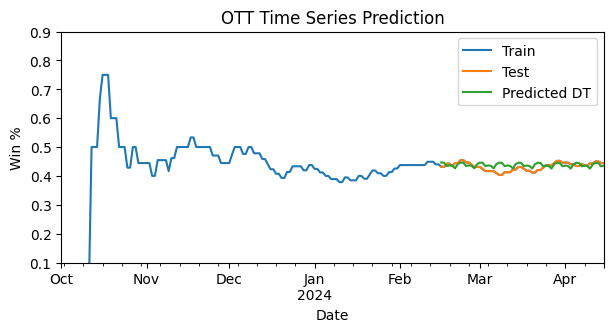

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/qmhh5ak7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/87osu5ty.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43039', 'data', 'file=/tmp/tmpcaffjw_d/qmhh5ak7.json', 'init=/tmp/tmpcaffjw_d/87osu5ty.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_modelrx7nr_10/prophet_model-20241215202734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


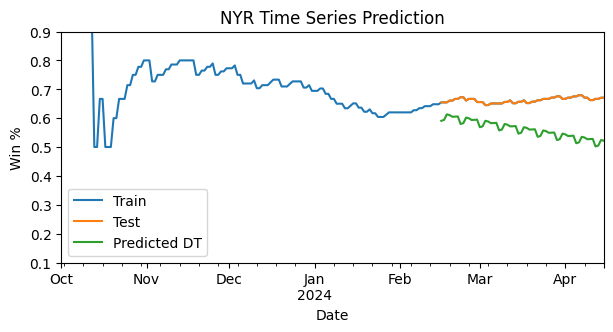

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/cfp3n0_n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/k1d1kwks.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76739', 'data', 'file=/tmp/tmpcaffjw_d/cfp3n0_n.json', 'init=/tmp/tmpcaffjw_d/k1d1kwks.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_modelsqkowo6i/prophet_model-20241215202735.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


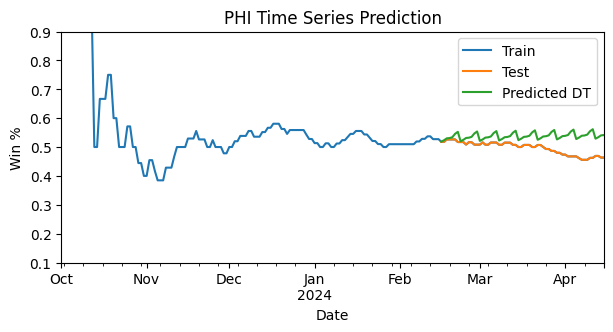

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/eux5c6pr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/xdq24jyd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59149', 'data', 'file=/tmp/tmpcaffjw_d/eux5c6pr.json', 'init=/tmp/tmpcaffjw_d/xdq24jyd.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_modeljd29rw1v/prophet_model-20241215202735.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


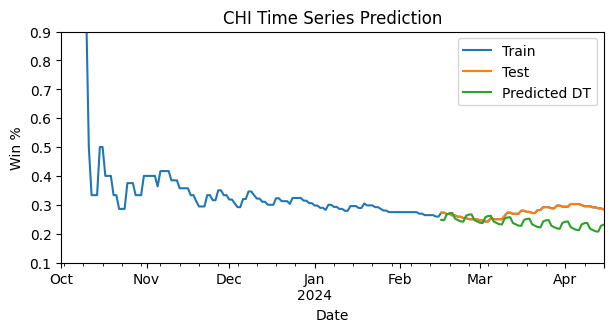

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/axinh9mn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/flubf3p_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94134', 'data', 'file=/tmp/tmpcaffjw_d/axinh9mn.json', 'init=/tmp/tmpcaffjw_d/flubf3p_.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_modeleo32q5ix/prophet_model-20241215202736.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


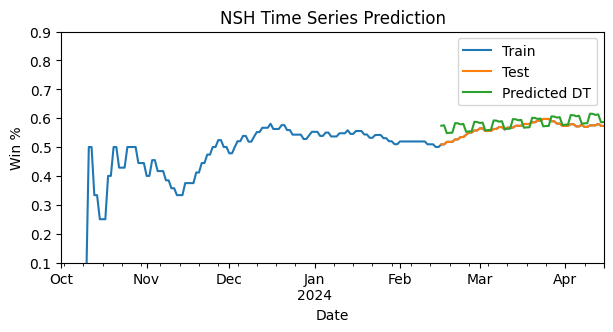

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/lwn8gwyi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/50dd9f71.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14377', 'data', 'file=/tmp/tmpcaffjw_d/lwn8gwyi.json', 'init=/tmp/tmpcaffjw_d/50dd9f71.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_modelk1jaj_td/prophet_model-20241215202737.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


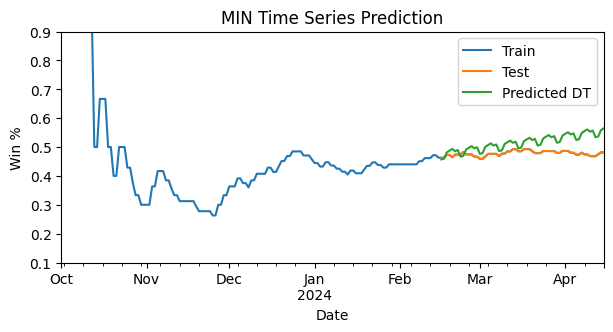

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/1wz8xa0_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/vx51a2ri.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12321', 'data', 'file=/tmp/tmpcaffjw_d/1wz8xa0_.json', 'init=/tmp/tmpcaffjw_d/vx51a2ri.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_modelrqse19ca/prophet_model-20241215202737.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


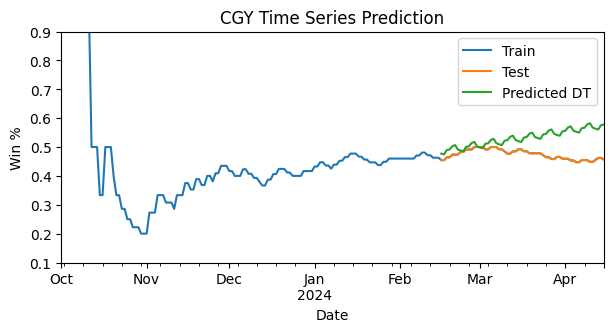

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/ry7o4siy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/kxm8btfh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39340', 'data', 'file=/tmp/tmpcaffjw_d/ry7o4siy.json', 'init=/tmp/tmpcaffjw_d/kxm8btfh.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_modelwhepzm3a/prophet_model-20241215202738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


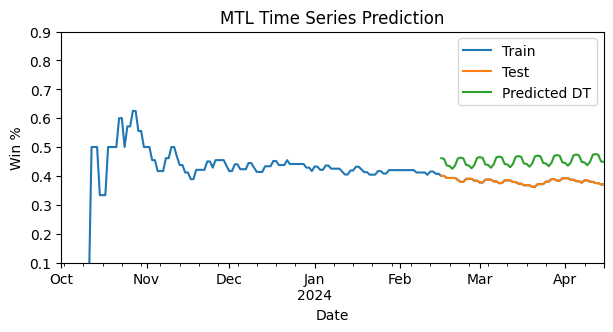

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/3ktqdnd6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/korpbu71.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75001', 'data', 'file=/tmp/tmpcaffjw_d/3ktqdnd6.json', 'init=/tmp/tmpcaffjw_d/korpbu71.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_modelkhmoxbzd/prophet_model-20241215202739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


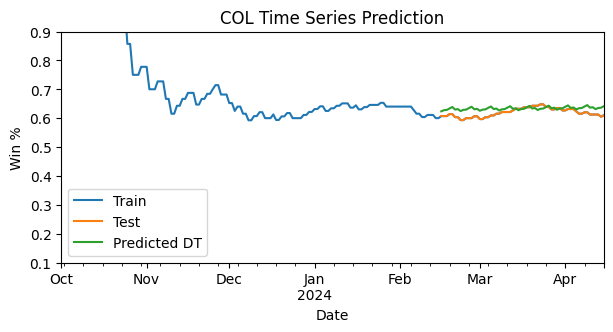

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/4fwe4il5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/k0pw27xe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70589', 'data', 'file=/tmp/tmpcaffjw_d/4fwe4il5.json', 'init=/tmp/tmpcaffjw_d/k0pw27xe.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_modelkqw7_jx1/prophet_model-20241215202739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


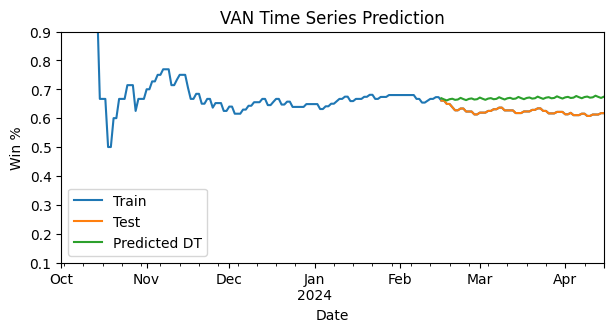

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/zp35bvy8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/8_cu227g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8117', 'data', 'file=/tmp/tmpcaffjw_d/zp35bvy8.json', 'init=/tmp/tmpcaffjw_d/8_cu227g.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_modelb_ugxci0/prophet_model-20241215202740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


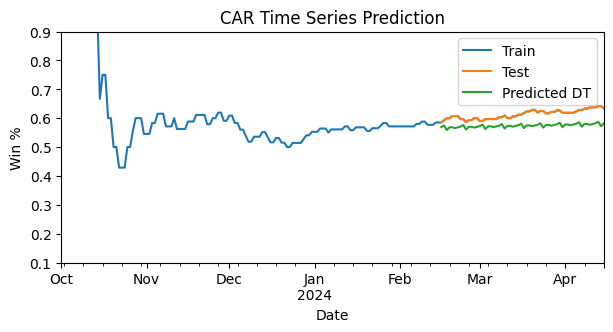

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/btdkjxm9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/z6ycsvoe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83072', 'data', 'file=/tmp/tmpcaffjw_d/btdkjxm9.json', 'init=/tmp/tmpcaffjw_d/z6ycsvoe.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_model33nkx4gh/prophet_model-20241215202741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


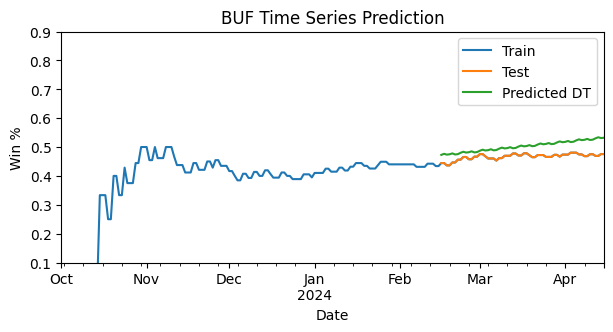

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/ckktt278.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/oag20pcf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3610', 'data', 'file=/tmp/tmpcaffjw_d/ckktt278.json', 'init=/tmp/tmpcaffjw_d/oag20pcf.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_model2gwe5enz/prophet_model-20241215202742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


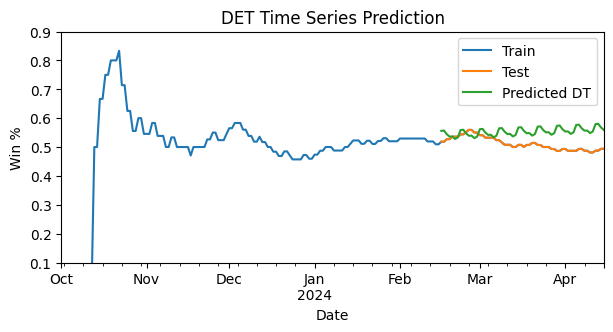

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/ew7h4_10.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/zuy2t2x7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99549', 'data', 'file=/tmp/tmpcaffjw_d/ew7h4_10.json', 'init=/tmp/tmpcaffjw_d/zuy2t2x7.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_modellh8c3lby/prophet_model-20241215202742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


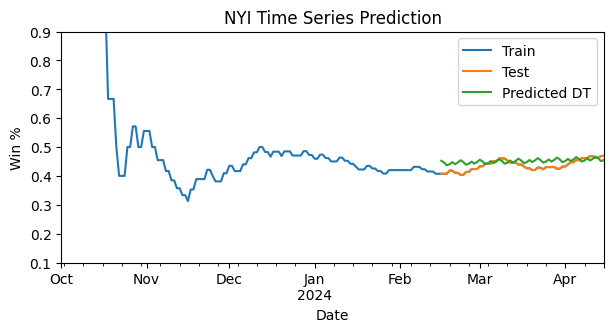

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/jalhxgls.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/0ndpz6io.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3043', 'data', 'file=/tmp/tmpcaffjw_d/jalhxgls.json', 'init=/tmp/tmpcaffjw_d/0ndpz6io.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_modelgp4hbbxc/prophet_model-20241215202743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


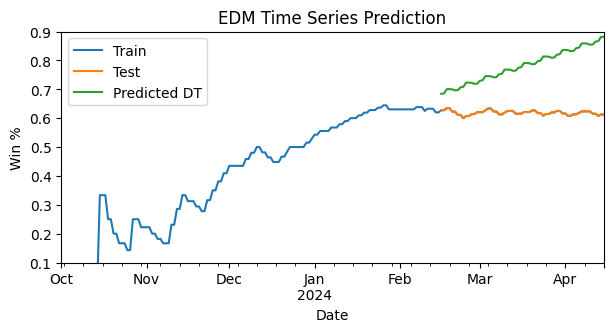

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/jrft1_x5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/5l9lfeez.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36686', 'data', 'file=/tmp/tmpcaffjw_d/jrft1_x5.json', 'init=/tmp/tmpcaffjw_d/5l9lfeez.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_modelssjh9go2/prophet_model-20241215202744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


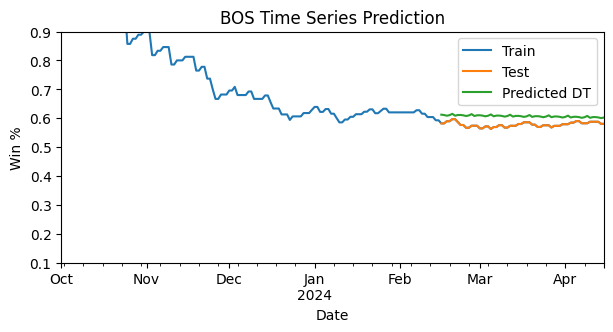

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/xhp9umeq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/x61pgymd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96042', 'data', 'file=/tmp/tmpcaffjw_d/xhp9umeq.json', 'init=/tmp/tmpcaffjw_d/x61pgymd.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_modelbiyr97cp/prophet_model-20241215202745.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


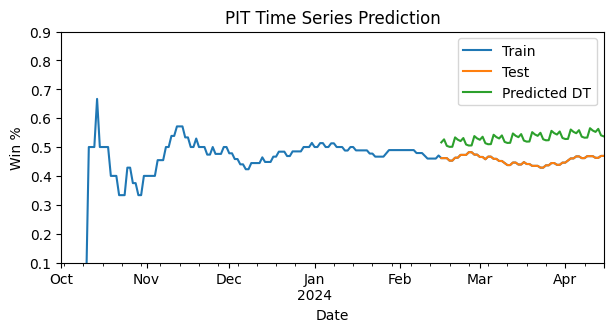

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/lz7yoqaa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/0lwu2yfh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9486', 'data', 'file=/tmp/tmpcaffjw_d/lz7yoqaa.json', 'init=/tmp/tmpcaffjw_d/0lwu2yfh.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_model2tjc3252/prophet_model-20241215202746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


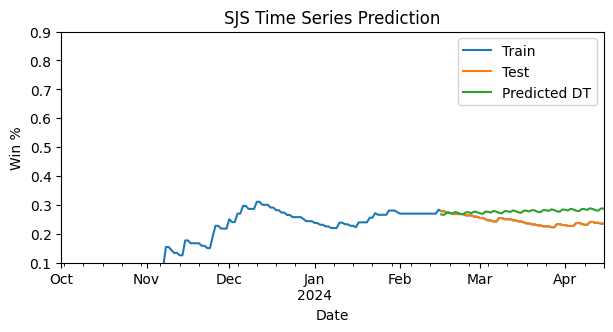

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/jh6bo0rt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/cado7074.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54886', 'data', 'file=/tmp/tmpcaffjw_d/jh6bo0rt.json', 'init=/tmp/tmpcaffjw_d/cado7074.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_modelltp_2aa2/prophet_model-20241215202746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


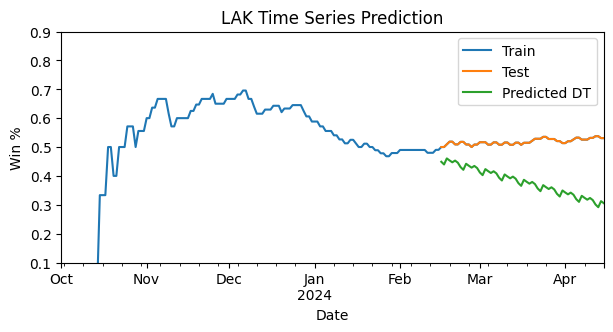

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/fytypqoa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/mq83dgkr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82482', 'data', 'file=/tmp/tmpcaffjw_d/fytypqoa.json', 'init=/tmp/tmpcaffjw_d/mq83dgkr.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_model75bfg1b6/prophet_model-20241215202747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


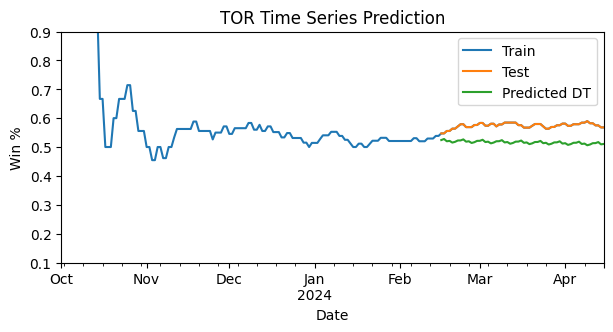

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/h9r7s08d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/fousxo7h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11710', 'data', 'file=/tmp/tmpcaffjw_d/h9r7s08d.json', 'init=/tmp/tmpcaffjw_d/fousxo7h.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_modeleeij3kuq/prophet_model-20241215202747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


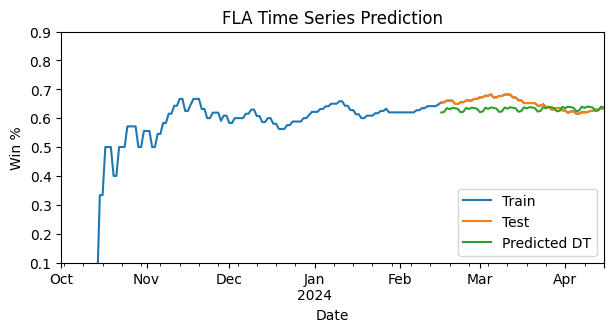

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/ldaykzbi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/ue0lq0_0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3002', 'data', 'file=/tmp/tmpcaffjw_d/ldaykzbi.json', 'init=/tmp/tmpcaffjw_d/ue0lq0_0.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_model96sbiseo/prophet_model-20241215202748.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


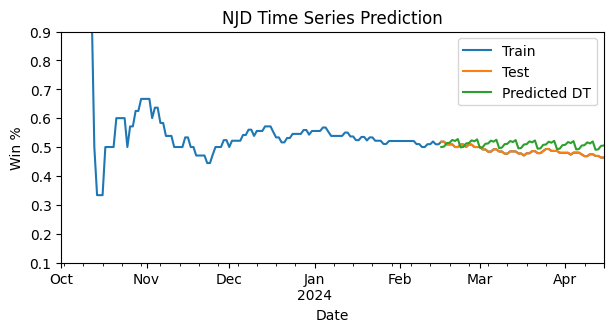

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/xibh8y71.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/5q7_xzes.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71560', 'data', 'file=/tmp/tmpcaffjw_d/xibh8y71.json', 'init=/tmp/tmpcaffjw_d/5q7_xzes.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_modeltf0_cr0e/prophet_model-20241215202749.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


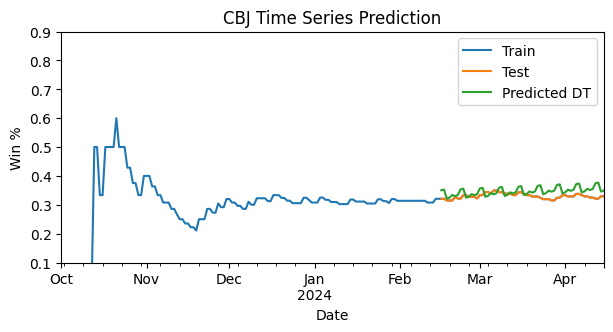

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/45b8oyu_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/l6_hynwl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59145', 'data', 'file=/tmp/tmpcaffjw_d/45b8oyu_.json', 'init=/tmp/tmpcaffjw_d/l6_hynwl.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_model9gdo4fre/prophet_model-20241215202749.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


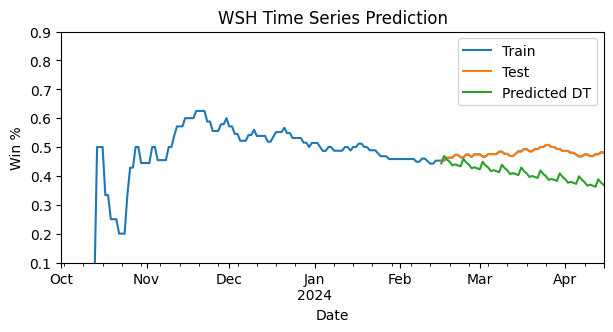

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/vo7u258c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/u468daly.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94897', 'data', 'file=/tmp/tmpcaffjw_d/vo7u258c.json', 'init=/tmp/tmpcaffjw_d/u468daly.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_model1rku4dw9/prophet_model-20241215202750.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


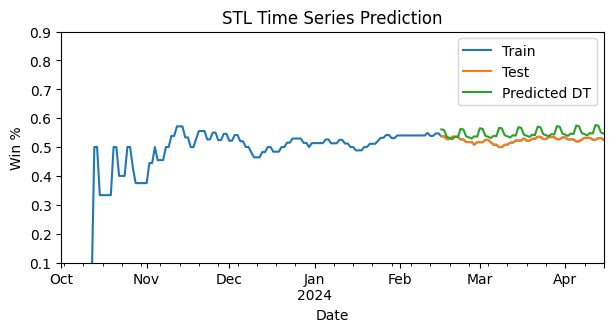

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/a9ro5msm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/kl72omu5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73979', 'data', 'file=/tmp/tmpcaffjw_d/a9ro5msm.json', 'init=/tmp/tmpcaffjw_d/kl72omu5.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_modelqjv9w8x9/prophet_model-20241215202751.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


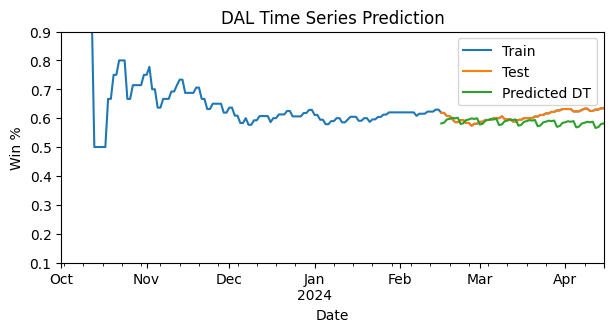

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/hrsbzhse.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/j1yero20.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83660', 'data', 'file=/tmp/tmpcaffjw_d/hrsbzhse.json', 'init=/tmp/tmpcaffjw_d/j1yero20.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_modelgx4hjpe6/prophet_model-20241215202751.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


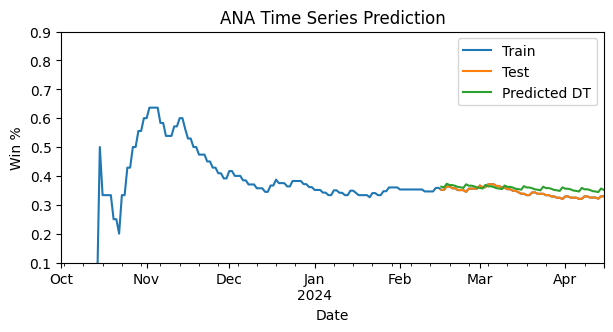

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/x4e1buph.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/8cnwze3d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11500', 'data', 'file=/tmp/tmpcaffjw_d/x4e1buph.json', 'init=/tmp/tmpcaffjw_d/8cnwze3d.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_modelbbltcban/prophet_model-20241215202752.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


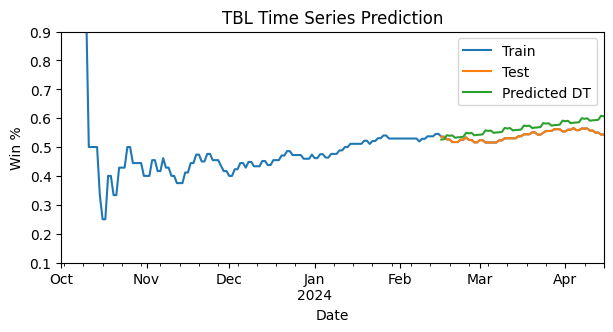

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/w07jxetv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/gs7gjav1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20451', 'data', 'file=/tmp/tmpcaffjw_d/w07jxetv.json', 'init=/tmp/tmpcaffjw_d/gs7gjav1.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_modelpdrcwblv/prophet_model-20241215202753.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


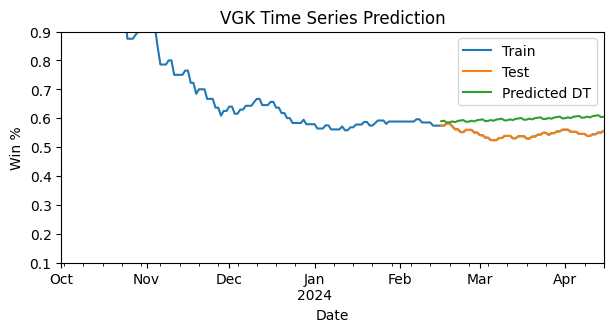

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/fdz1icsd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/ktdd9k46.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89903', 'data', 'file=/tmp/tmpcaffjw_d/fdz1icsd.json', 'init=/tmp/tmpcaffjw_d/ktdd9k46.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_modeliqf745ct/prophet_model-20241215202753.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


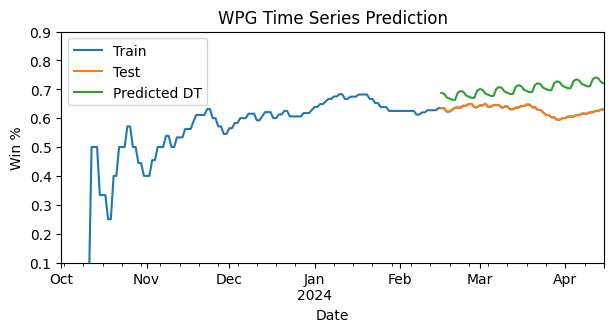

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/9_nd4nv8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/2ffciziu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47407', 'data', 'file=/tmp/tmpcaffjw_d/9_nd4nv8.json', 'init=/tmp/tmpcaffjw_d/2ffciziu.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_models0gl2dm0/prophet_model-20241215202754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


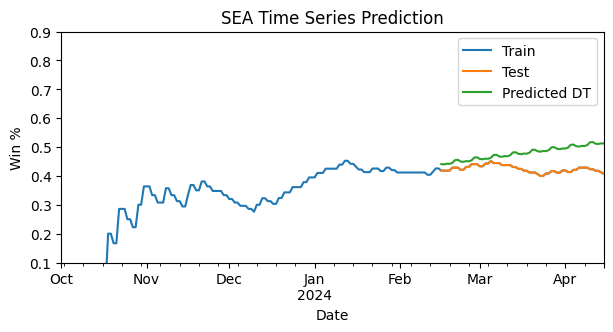

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/z21ajn2a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcaffjw_d/qledm4rl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64784', 'data', 'file=/tmp/tmpcaffjw_d/z21ajn2a.json', 'init=/tmp/tmpcaffjw_d/qledm4rl.json', 'output', 'file=/tmp/tmpcaffjw_d/prophet_modelh_yl_r8s/prophet_model-20241215202755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:27:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:27:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


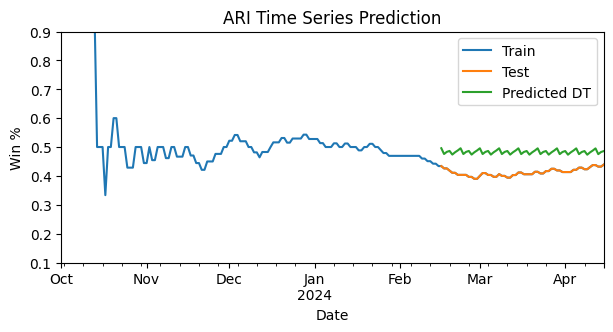

{'OTT': 0.0156828244158845, 'NYR': 0.1069394895836168, 'PHI': 0.04933257887638358, 'CHI': 0.047115424365308446, 'NSH': 0.02717909833708651, 'MIN': 0.04466766305701932, 'CGY': 0.06960749135827508, 'MTL': 0.07250701986505023, 'COL': 0.02016847490889487, 'VAN': 0.04735688449683482, 'CAR': 0.041044792512432225, 'BUF': 0.03782004342563668, 'DET': 0.05143833824573781, 'NYI': 0.022386434481768625, 'EDM': 0.17193561813406563, 'BOS': 0.030372715908085313, 'PIT': 0.08049428939443594, 'SJS': 0.03844754677555216, 'LAK': 0.14919492138915894, 'TOR': 0.05893838515684441, 'FLA': 0.02838184877350755, 'NJD': 0.027311799480758, 'CBJ': 0.023513998989229262, 'WSH': 0.07679361458166953, 'STL': 0.028919961417989602, 'DAL': 0.03128346142037158, 'ANA': 0.018932811156659155, 'TBL': 0.029527256864125887, 'VGK': 0.052692288865993066, 'WPG': 0.07873521701299616, 'SEA': 0.062031163986172665, 'ARI': 0.07225134970698703}


In [21]:
team_rmse = {}
for team in teams:
  df = team_time_dataframe[team]
  rmse = plot_team_time_series(df, team)
  team_rmse[team] = rmse
print(team_rmse)